## Import libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib notebook

## Scrape datasets from wikipedia

In [2]:
# Seattle Seahawks
url = 'https://en.wikipedia.org/wiki/List_of_Seattle_Seahawks_seasons'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table = soup.find_all('table', {"class": "wikitable"})

In [3]:
# Seattle Mariners
url = 'https://en.wikipedia.org/wiki/List_of_Seattle_Mariners_seasons'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table_m = soup.find_all('table', {"class": "wikitable"})

## Prepare data

### Seahawks

In [4]:
df_s = pd.read_html(str(table)) 
df_s = pd.DataFrame(df_s[1])
df_s = df_s.loc[:, df_s.columns.get_level_values(1).isin({"Team", "Pct"})]
df_s.columns = df_s.columns.droplevel()
df_s = df_s.iloc[:45].rename(columns={'Team':'year', 'Pct':'WL ratio Seahawks'})
df_s['year'] = df_s['year'].astype(int)

In [5]:
# 10-year moving average
df_s['WL ratio Seahawks Averaged'] = df_s.iloc[:,1].rolling(window=10).mean()
df_s = df_s[['year', 'WL ratio Seahawks Averaged']].dropna()
df_s.head()

,year,WL ratio Seahawks Averaged
9,1985,0.4508
10,1986,0.4990
11,1987,0.5233
12,1988,0.5233
13,1989,0.5108


### Mariners

In [6]:
df_m = pd.read_html(str(table_m)) 
df_m = pd.DataFrame(df_m[2])
df_m = df_m[['Teamseason','Win%']].iloc[:44].rename(columns={'Teamseason':'year', 'Win%':'WL ratio Mariners'})
df_m['year'] = df_m['year'].replace("\[.*\]", "", regex=True)
df_m['year'] = df_m['year'].astype(int)
df_m['WL ratio Mariners'] = df_m['WL ratio Mariners'].astype(float)

In [7]:
# 10-year moving average
df_m['WL ratio Mariners Averaged'] = df_m.iloc[:,1].rolling(window=10).mean()
df_m = df_m[['year', 'WL ratio Mariners Averaged']].dropna()
df_m.head()

,year,WL ratio Mariners Averaged
9,1986,0.4094
10,1987,0.4180
11,1988,0.4252
12,1989,0.4289
13,1990,0.4400


### Merge two datasets to df

In [8]:
df = pd.merge(df_s, df_m, how='inner', on=['year'])
df.set_index('year', inplace=True)
df.head()

,WL ratio Seahawks Averaged,WL ratio Mariners Averaged
year,,
1986,0.4990,0.4094
1987,0.5233,0.4180
1988,0.5233,0.4252
1989,0.5108,0.4289
1990,0.5421,0.4400


### Analyze, model, and visualize

<IPython.core.display.Javascript object>


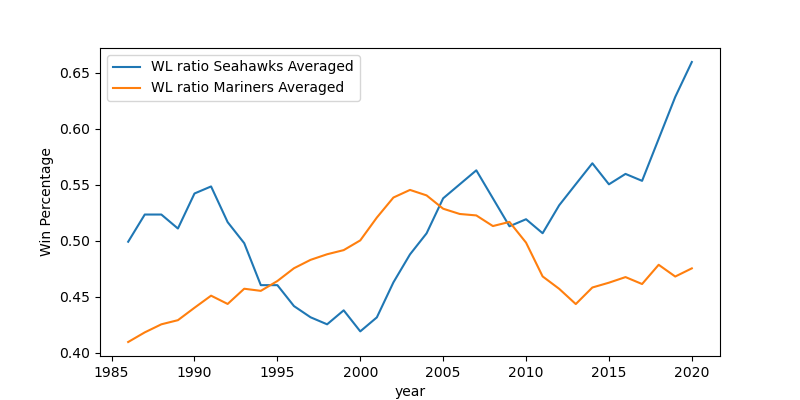

In [9]:
ax = df.plot(figsize=(8,4));
ax.set_ylabel('Win Percentage');


### State the region and the domain category that your data sets are about
Seattle, Washington Sports

### Create a research question about the domain category and region that you identified.
How have the win percentages for the two major Seattle sports teams (Seahawks and Mariners) changed over the last forty years?

### Provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
https://en.wikipedia.org/wiki/List_of_Seattle_Mariners_seasons

https://en.wikipedia.org/wiki/List_of_Seattle_Seahawks_seasons#cite_note-1

### Upload an image which addresses your research question. 

### Provide a short (1-2 paragraphs) justification of how your visual addresses your research question.
This visualization was concerned with answering the question of how the win percentages of the two major Seattle sports teams (Seahawks and Mariners) have changed over the last 40 years. Wikipedia was scraped for data concerning wins and losses by season for each team. Data cleaning has been conducted. A 10-year moving average was plotted to help the reader identify any major trends in the team’s win percentages.  The plot indicates the years of high win percentage for Seahawks are around 1990 and 2007, with periods of decline following both high points. The Mariner’s win percentage shows a continuing increase up to 2003 and stays high from 2003 to 2010.